In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.optimize import curve_fit

In [ ]:
def ebfe_fit_naprime(Zs, a, b, c):
    Z1, Z2 = Zs.T
    E_AB = -a+b*Z1*Z2-c*(Z1**(7/3)+Z2**(7/3))
    return()

In [38]:
def ebfe_fit_naprime(Zs, a, b, c):
    Z1, Z2 = Zs.T
    E_AB = -a+b*Z1*Z2-c*(Z1**(7/3)+Z2**(7/3))
    return(E_AB)

In [39]:
energies_double = np.loadtxt('/data/sahre/projects/atomic-energies/data/bonding_trends/pbe0_data/row_2/energies_double.txt')
ebfe_double = energies_double[:,1]*630
nbfe_double = energies_double[:,2]*630
ref_bde_double = -energies_double[:,0]*630

# ebfe_ref = ebfe_exp_double
# bfe_ref = energies_double[:,0]*2600
# bde_ref = -bfe_ref

In [40]:
ref_bde_double

array([180.53524909, 164.64257557, 182.82997264, 130.43093305,
       122.31147952,  87.53562585])

In [41]:
energies_double

array([[ -0.28656389, -15.74942297,  15.46285908],
       [ -0.26133742, -18.30133968,  18.04000226],
       [ -0.29020631, -20.90735175,  20.61714544],
       [ -0.20703323, -21.25370253,  21.04666931],
       [ -0.19414521, -24.24748156,  24.05333635],
       [ -0.13894544, -27.6284727 ,  27.48952726]])

In [42]:
energies_double_t = np.loadtxt('/data/sahre/projects/atomic-energies/data/bonding_trends/pbe0_data/row_2/energies_double_triplet.txt')
ebfe_double_t = energies_double_t[:,1]*630
nbfe_double_t = energies_double_t[:,2]*630
ref_bde_double_t = -energies_double_t[:,0]*630

# ebfe_ref_t = ebfe_exp_double_t
# bfe_ref_t = energies_double_t[:,0]*2600
# bde_ref_t = -bfe_ref_t

In [43]:
# energies = [-78.499511, -94.542928, -114.414179, -110.557845, -130.389415, -150.239678]
# frags = [-39.103912, -55.168965, -75.004893]

# energies = [-78.623180, -94.669398, -114.549407, -110.685393, -130.523489, -150.380944]
# frags = [-39.168745, -55.242810, -75.091863]


# bfe_ref = [energies[0]-(2*frags[0]), energies[1]-(frags[0]+frags[1]), energies[2]-(frags[0]+frags[2]), energies[3]-(2*frags[1]), energies[4]-(frags[1]+frags[2]), energies[5]-(2*frags[2])]
# bfe_ref = np.array(bfe_ref)*2600
# ebfe_ref = bfe_ref-nbfe_double
# bde_ref = -bfe_ref

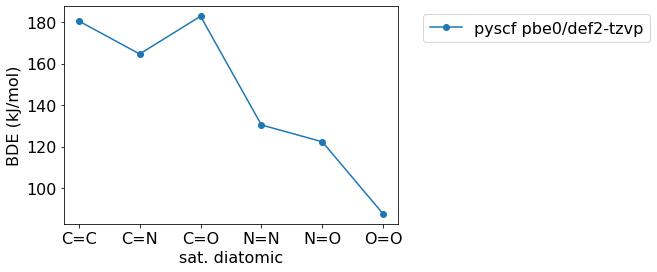

In [44]:
comps_double = ['C=C', 'C=N', 'C=O', 'N=N', 'N=O', 'O=O']

# plt.plot(comps_double, bde_ref, '-o',label = 'NIST b3lyp/cc-pVTZ')
plt.plot(comps_double, ref_bde_double, '-o', label = 'pyscf pbe0/def2-tzvp')
plt.legend()
plt.ylabel('BDE (kJ/mol)')
plt.xlabel('sat. diatomic')
plt.legend(bbox_to_anchor = (1.05,1))

In [45]:
xdata_double = np.array([[6,6], [6,7], [6,8], [7,7], [7,8], [8,8]])

out_naprime_double = curve_fit(ebfe_fit_naprime, xdata_double, ebfe_double)

bde_fit_naprime_double = -(ebfe_fit_naprime(xdata_double, out_naprime_double[0][0], out_naprime_double[0][1], out_naprime_double[0][2]) + nbfe_double)

mae_naprime_double = np.abs(bde_fit_naprime_double-ref_bde_double).mean()

In [46]:
xdata_double = np.array([[6,6], [6,7], [6,8], [7,7], [7,8], [8,8]])

out_naprime_double_t = curve_fit(ebfe_fit_naprime, xdata_double, ebfe_double_t)

bde_fit_naprime_double_t = -(ebfe_fit_naprime(xdata_double, out_naprime_double_t[0][0], out_naprime_double_t[0][1], out_naprime_double_t[0][2]) + nbfe_double_t)

mae_naprime_double_t = np.abs(bde_fit_naprime_double_t-ref_bde_double_t).mean()

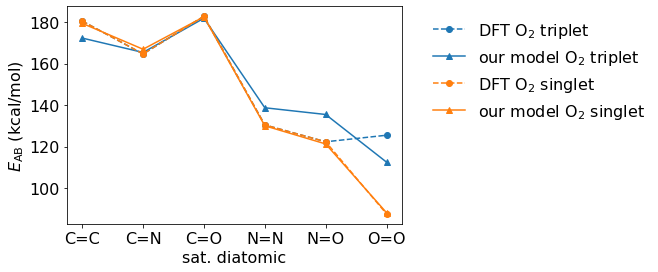

In [58]:
comps_double = ['C=C', 'C=N', 'C=O', 'N=N', 'N=O', 'O=O']
plt.rcParams['font.size'] = 16


plt.plot(comps_double, ref_bde_double_t, '--o', label = r'DFT O$_2$ triplet', color = 'tab:blue')
# plt.plot(comps_double, bde_fit_naprime_double_t, '-o', label = f'fit O2 triplet MAE {np.round(mae_naprime_double_t,1)} kcal/mol', color = 'tab:blue')
plt.plot(comps_double, bde_fit_naprime_double_t, '-^', label = r'our model O$_2$ triplet', color = 'tab:blue')

plt.plot(comps_double, ref_bde_double, '--o', label = 'DFT O$_2$ singlet', color = 'tab:orange')
plt.plot(comps_double, bde_fit_naprime_double, '-^', label = f'our model O$_2$ singlet', color = 'tab:orange')

plt.ylabel(r'$E_{\rm{AB}}$ (kcal/mol)')
plt.xlabel('sat. diatomic')
plt.legend(bbox_to_anchor = (1.05,1), frameon = False)

plt.savefig('/home/sahre/work/bonding_trends/figures/results/bde_double_bonds.png', dpi=300, bbox_inches = 'tight')

In [48]:
np.round(mae_naprime_double_t,1)

7.4

In [49]:
np.round(mae_naprime_double,1)

0.9